FRQI encoding simulated...


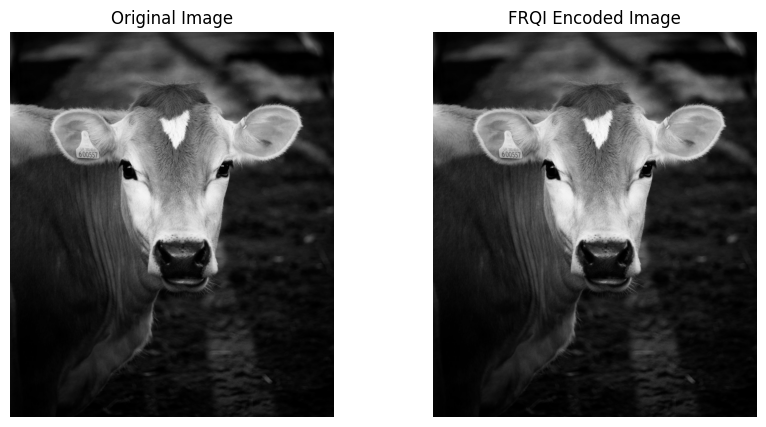

NEQR encoding simulated...
NEQR Encoded Image (binary format): 
[['00100010' '00100000' '00011011' '00010111' '00010100' '00010001'
  '00001110' '00001100' '00001010' '00001000']
 ['00100011' '00100000' '00011011' '00010111' '00010100' '00010001'
  '00001110' '00001101' '00001010' '00001001']
 ['00100011' '00100000' '00011100' '00010111' '00010100' '00010001'
  '00001110' '00001101' '00001010' '00001001']
 ['00100011' '00100000' '00011100' '00011000' '00010100' '00010001'
  '00001111' '00001101' '00001010' '00001001']
 ['00100011' '00100000' '00011100' '00011000' '00010100' '00010001'
  '00001111' '00001101' '00001010' '00001001']
 ['00100011' '00100000' '00011100' '00011000' '00010101' '00010010'
  '00001111' '00001101' '00001010' '00001001']
 ['00100011' '00100001' '00011100' '00011000' '00010101' '00010010'
  '00001111' '00001101' '00001011' '00001001']
 ['00100100' '00100001' '00011100' '00011000' '00010101' '00010010'
  '00001111' '00001110' '00001011' '00001010']
 ['00100100' '00

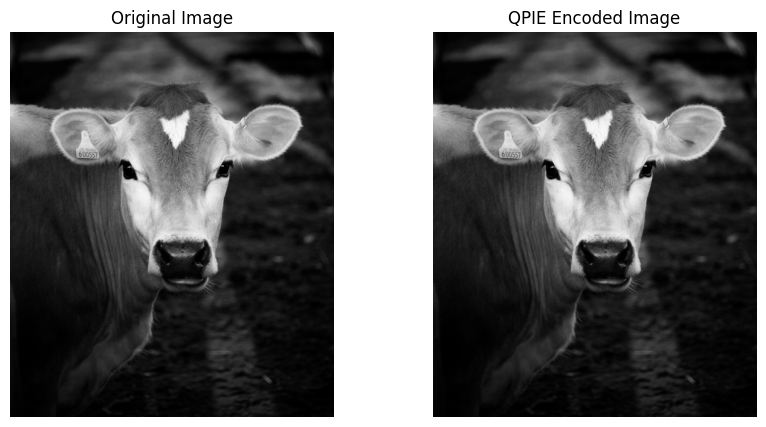

Quantum edge detection simulated...


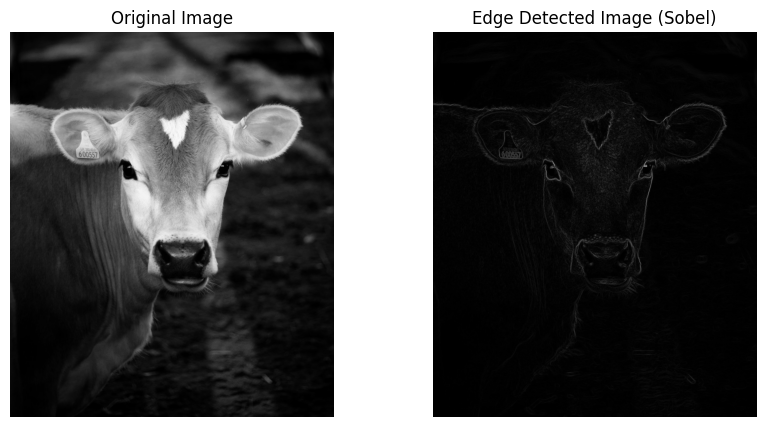

In [1]:
import numpy as np
from scipy.ndimage import convolve
from PIL import Image
import matplotlib.pyplot as plt

def frqi_encode(image_array):
    """Simulate FRQI image encoding."""
    print("FRQI encoding simulated...")
    # Simulate by scaling pixel intensities (normalize)
    encoded_image = image_array / np.max(image_array)
    return encoded_image

def neqr_encode(image_array):
    """Simulate NEQR image encoding."""
    print("NEQR encoding simulated...")
    # Simulate NEQR by representing pixel values as binary strings
    neqr_image = np.vectorize(lambda x: bin(int(x * 255))[2:].zfill(8))(image_array)
    return neqr_image

def qpie_encode(image_array):
    """Simulate QPIE image encoding."""
    print("QPIE encoding simulated...")
    # Simulate QPIE by applying a probability distribution over pixel intensities
    qpie_image = image_array / np.sum(image_array)
    return qpie_image

def edge_detection(image_array):
    """Simulate quantum edge detection using Sobel filter."""
    print("Quantum edge detection simulated...")
    
    # Sobel filter kernels for edge detection
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    
    # Apply the Sobel filter to detect edges
    grad_x = convolve(image_array, sobel_x)
    grad_y = convolve(image_array, sobel_y)
    
    # Combine the gradients
    edges = np.sqrt(grad_x**2 + grad_y**2)
    edges = edges / np.max(edges)  # Normalize edge values between 0 and 1
    
    return edges

# Preprocess the image by converting to grayscale and normalizing
def preprocess_image(image_path):
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    image_array = np.array(image) / 255.0  # Normalize pixel values between 0 and 1
    return image, image_array

# Display original and processed images
def display_image(original_image, processed_image, title="Processed Image"):
    plt.figure(figsize=(10, 5))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    # Processed Image
    plt.subplot(1, 2, 2)
    plt.imshow(processed_image, cmap='gray')
    plt.title(title)
    plt.axis('off')

    plt.show()

# Main function to run the quantum image encoding and edge detection simulation
def simulate_quantum_image_methods(image_path):
    # Step 1: Load and preprocess the image
    original_image, image_array = preprocess_image(image_path)

    # Step 2: Apply FRQI encoding
    frqi_image = frqi_encode(image_array)
    display_image(original_image, frqi_image, title="FRQI Encoded Image")

    # Step 3: Apply NEQR encoding
    neqr_image = neqr_encode(image_array)
    print(f"NEQR Encoded Image (binary format): \n{neqr_image[:10, :10]}")  # Print a small part of binary representation

    # Step 4: Apply QPIE encoding
    qpie_image = qpie_encode(image_array)
    display_image(original_image, qpie_image, title="QPIE Encoded Image")

    # Step 5: Apply edge detection
    edge_detected_image = edge_detection(image_array)
    display_image(original_image, edge_detected_image, title="Edge Detected Image (Sobel)")

# Example usage
image_path = r"D:\6m_NIC\images\cow.jpeg"  # Replace with your image path
simulate_quantum_image_methods(image_path)


In [ ]:
def frqi_encode(image_array):
    """Simulate FRQI image encoding using Qiskit for a grayscale image."""
    
    # Normalize the image pixel values to the range [0, 1]
    normalized_image = image_array / 255.0  # assuming 8-bit grayscale image (0-255)

    # Determine the number of qubits needed for image dimensions
    num_pixels = image_array.size
    num_qubits = int(np.log2(num_pixels))  # FRQI requires log2(num_pixels) qubits

    # Create quantum circuit with num_qubits for pixel positions + 1 qubit for intensity
    qc = QuantumCircuit(num_qubits + 1)

    # Apply Hadamard gates to create superposition for pixel positions
    qc.h(range(num_qubits))

    # Placeholder for applying controlled rotation based on pixel intensities
    # This would involve a controlled-Ry gate for each pixel intensity
    for idx, intensity in np.ndenumerate(normalized_image):
        theta = np.arcsin(np.sqrt(intensity))  # Intensity converted to a rotation angle
        # Apply controlled rotation (in actual quantum implementation)
        qc.cry(2 * theta, idx[0], num_qubits)  # Control by pixel position qubits
    
    # Simulate the quantum circuit (this part is not real quantum encoding, just simulation)
    simulator = Aer.get_backend('statevector_simulator')
    compiled_circuit = transpile(qc, simulator)
    qobj = assemble(compiled_circuit)
    result = simulator.run(qobj).result()
    
    statevector = result.get_statevector()
    print("Statevector:", statevector)

    return qc

In [2]:
import numpy as np
from scipy.ndimage import convolve
from PIL import Image
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

def frqi_encode(image_array):
    """Simulate FRQI image encoding using Qiskit for a grayscale image."""
    
    # Normalize the image pixel values to the range [0, 1]
    normalized_image = image_array / 255.0  # assuming 8-bit grayscale image (0-255)

    # Determine the number of qubits needed for image dimensions
    num_pixels = image_array.size
    num_qubits = int(np.log2(num_pixels))  # FRQI requires log2(num_pixels) qubits

    # Create quantum circuit with num_qubits for pixel positions + 1 qubit for intensity
    qc = QuantumCircuit(num_qubits + 1)

    # Apply Hadamard gates to create superposition for pixel positions
    qc.h(range(num_qubits))

    # Placeholder for applying controlled rotation based on pixel intensities
    # This would involve a controlled-Ry gate for each pixel intensity
    for idx, intensity in np.ndenumerate(normalized_image):
        theta = np.arcsin(np.sqrt(intensity))  # Intensity converted to a rotation angle
        # Apply controlled rotation (in actual quantum implementation)
        qc.cry(2 * theta, idx[0], num_qubits)  # Control by pixel position qubits
    
    # Simulate the quantum circuit (this part is not real quantum encoding, just simulation)
    simulator = Aer.get_backend('statevector_simulator')
    compiled_circuit = transpile(qc, simulator)
    qobj = assemble(compiled_circuit)
    result = simulator.run(qobj).result()
    
    statevector = result.get_statevector()
    print("Statevector:", statevector)

    return frqi_encode(image_array)

def neqr_encode(image_array):
    """Simulate NEQR image encoding using Qiskit for a grayscale image."""
    
    # Normalize the image pixel values to the range [0, 1]
    normalized_image = image_array / 255.0  # Assuming 8-bit grayscale image (0-255)
    
    # Get the dimensions of the image
    height, width = normalized_image.shape
    
    # Number of qubits needed for pixel positions
    pos_qubits = int(np.ceil(np.log2(height * width)))  # log2(number of pixels)
    
    # Create quantum circuit
    qc = QuantumCircuit(pos_qubits + 1)  # +1 for intensity qubit
    
    # Apply Hadamard gates to create superposition for pixel positions
    qc.h(range(pos_qubits))
    
    # Encode pixel values in quantum states
    for i in range(height):
        for j in range(width):
            intensity = normalized_image[i, j]
            # Convert intensity to rotation angle (theta)
            theta = 2 * np.arccos(np.sqrt(intensity))  # Using arcsin for quantum rotation
            # Apply a controlled rotation based on the pixel position
            qc.cry(theta, pos_qubits, pos_qubits + i * width + j)  # Controlled rotation on intensity qubit
            
    # Simulate the quantum circuit (this part is not real quantum encoding, just simulation)
    simulator = Aer.get_backend('statevector_simulator')
    compiled_circuit = transpile(qc, simulator)
    qobj = assemble(compiled_circuit)
    result = simulator.run(qobj).result()
    
    statevector = result.get_statevector()
    print("Statevector:", statevector)

    return neqr_encode(image)

def qpie_encode(image_array):
    """Simulate QPIE encoding using Qiskit for a grayscale image."""
    
    # Normalize the image pixel values to the range [0, 1]
    normalized_image = image_array / 255.0  # Assuming 8-bit grayscale image (0-255)
    
    # Get the dimensions of the image
    height, width = normalized_image.shape
    
    # Number of qubits needed for pixel positions
    pos_qubits = int(np.ceil(np.log2(height * width)))  # log2(number of pixels)
    # Number of qubits needed for intensity representation
    intensity_qubits = int(np.ceil(np.log2(255)))  # For 8-bit intensity

    # Create quantum circuit
    qc = QuantumCircuit(pos_qubits + intensity_qubits)  # Combine position and intensity qubits
    
    # Apply Hadamard gates to create superposition for pixel positions
    qc.h(range(pos_qubits))
    
    # Encode pixel values in quantum states
    for i in range(height):
        for j in range(width):
            intensity = normalized_image[i, j]
            # Convert intensity to amplitude for the quantum state
            amplitude = np.sqrt(intensity)
            if amplitude > 0:
                # Set the state corresponding to the pixel position
                qc.initialize([amplitude if k == i * width + j else 0 for k in range(height * width)], pos_qubits)
                
                # Apply controlled rotation to represent intensity
                angle = 2 * np.arccos(amplitude)  # Using arccos for amplitude representation
                qc.cry(angle, pos_qubits, pos_qubits + (i * width + j))  # Controlled rotation on intensity qubit

    # Simulate the quantum circuit (this part is not real quantum encoding, just simulation)
    simulator = Aer.get_backend('statevector_simulator')
    compiled_circuit = transpile(qc, simulator)
    qobj = assemble(compiled_circuit)
    result = simulator.run(qobj).result()
    
    statevector = result.get_statevector()
    print("Statevector:", statevector)

    return qpie_encode(image_array)

def edge_detection(image_array):
    """Simulate quantum edge detection using Sobel filter."""
    print("Quantum edge detection simulated...")
    
    # Sobel filter kernels for edge detection
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    
    # Apply the Sobel filter to detect edges
    grad_x = convolve(image_array, sobel_x)
    grad_y = convolve(image_array, sobel_y)
    
    # Combine the gradients
    edges = np.sqrt(grad_x**2 + grad_y**2)
    edges = edges / np.max(edges)  # Normalize edge values between 0 and 1
    
    return edges

# Preprocess the image by converting to grayscale and normalizing
def preprocess_image(image_path):
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    image_array = np.array(image) / 255.0  # Normalize pixel values between 0 and 1
    return image, image_array

# Display original and processed images
def display_image(original_image, processed_image, title="Processed Image"):
    plt.figure(figsize=(10, 5))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    # Processed Image
    plt.subplot(1, 2, 2)
    plt.imshow(processed_image, cmap='gray')
    plt.title(title)
    plt.axis('off')

    plt.show()

# Main function to run the quantum image encoding and edge detection simulation
def simulate_quantum_image_methods(image_path):
    # Step 1: Load and preprocess the image
    original_image, image_array = preprocess_image(image_path)

    # Step 2: Apply FRQI encoding
    frqi_image = frqi_encode(image_array)
    display_image(original_image, frqi_image, title="FRQI Encoded Image")

    # Step 3: Apply NEQR encoding
    neqr_image = neqr_encode(image_array)
    print(f"NEQR Encoded Image (binary format): \n{neqr_image[:10, :10]}")  # Print a small part of binary representation

    # Step 4: Apply QPIE encoding
    qpie_image = qpie_encode(image_array)
    display_image(original_image, qpie_image, title="QPIE Encoded Image")

    # Step 5: Apply edge detection
    edge_detected_image = edge_detection(image_array)
    display_image(original_image, edge_detected_image, title="Edge Detected Image (Sobel)")

# Example usage
image_path = r"D:\6m_NIC\images\cow.jpeg"  # Replace with your image path
simulate_quantum_image_methods(image_path)


ImportError: Qiskit is installed in an invalid environment that has both Qiskit >=1.0 and an earlier version. You should create a new virtual environment, and ensure that you do not mix dependencies between Qiskit <1.0 and >=1.0. Any packages that depend on 'qiskit-terra' are not compatible with Qiskit 1.0 and will need to be updated. Qiskit unfortunately cannot enforce this requirement during environment resolution. See https://qisk.it/packaging-1-0 for more detail.